In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import numpy as np
from spacy.matcher import DependencyMatcher
import re
from sklearn import preprocessing
from io import StringIO
import io


In [2]:
class a:
    value=9
    def __init__(self):
            print("I'm a parent")
            
    def fnc():
        print("parent fnc")
    
class b(a):
    def __init__(self):
            #super().__init__()
            print("I'm a child!")
    @classmethod            
    def fnc(cls):
        super().fnc()
        print("child fnc")
    @classmethod        
    def getValue(cls):
        return super().value
        
b=b()
b.fnc()
b.getValue()

I'm a child!
parent fnc
child fnc


9

Model   A3  A5  Caddy  Camry  Chevy  Corolla  M3  RS5  X1
brand                                                    
Audi     3   2      0      0      0        0   0    4   0
BMW      0   0      0      0      0        0   3    0   2
GM       0   0      2      0      4        0   0    0   0
Toyota   0   0      0      1      0        1   0    0   0


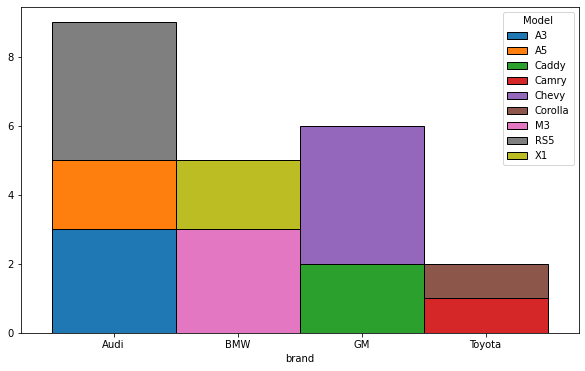

In [3]:
data = {'brand': ['Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'GM', 'GM', 'GM', 'GM', 'GM', 'GM', 'Toyota', 'Toyota'],
        'Model': ['A3', 'A3', 'A3', 'A5', 'A5', 'RS5', 'RS5', 'RS5', 'RS5', 'M3', 'M3', 'M3', 'X1', 'X1', 'Chevy', 'Chevy', 'Chevy', 'Chevy', 'Caddy', 'Caddy', 'Camry', 'Corolla']}
df = pd.DataFrame(data)

# reshape the dataframe and get count of each model per brand
ct = pd.crosstab(df.brand, df.Model)
print(ct)
ax = ct.plot(kind='bar', stacked=True, width=1, ec='k', figsize=(10, 6), rot=0)

In [27]:
df=pd.read_excel('content.xlsx')
sentences=[]
print(df['content'])

0       <P>1. R GRAB: L STEP BACK INTO L COVER AND R I...
1       <P>1. R GRAB STEP BACK L FOOT, R ELBOW OVER OP...
2       <P>1. L GRAB: SHORT L BACK STEP, R PROBE ARMPI...
3       <P>1. R GRAB: L OUTWARD BLOCK, STEP IN R FOOT ...
4       <P>1. TWO-HANDED GRAB: STEP BACK L FOOT WHILE ...
                              ...                        
2031    Overview: This code snippet demonstrates, how ...
2032    Overview: This code snippet demonstrates how t...
2033    Overview:  This code snippet shortens the time...
2034    Overview: In this code snippet, I demonstrate ...
2035    Overview: This code snippet demonstrates how t...
Name: content, Length: 2036, dtype: object


In [28]:
data=[]
for key, row in df.iterrows():
    paragraph=row['content']
    #print(paragraph)
    sentences = paragraph.split('.')
    for sentence in sentences:
        content=' '.join(word for word in sentence.split(" ") if word.isalnum())
        #print(content)
        data.append(content)
        #if sentence.isalnum():
            #data.append(sentence)
            #print(sentence)
        
print(data[0:100])

['', 'R L STEP BACK INTO L COVER AND R INWARD BLOCK TO BICEP ADJUSTING TO HORSE FACING R TO BACK R TO', 'R TWO HANDED R TO SOLAR MOVE INTO A R COVER', '', 'RUNNING R L R L PUNCH TO R KICK TO TURN ANOTHER 45 DEGREES AND PLANT FORWARD UNDER OPPONENTS R CHOP TO BACK OF NECK', 'R COVER', '', 'GIVE GROUND TO L COVER BLOCKING INWARD AND R BETWEEN EYES DRAG L FOOT TO R INSTEP AND SHIFT WEIGHT TO LEFT R FRONT SNAP KICK TO DROP INTO', 'R STEP FORWARD TO L COVER WITH 2 HANDED BLOCK ARM ACROSS R HAND SLIDING CHOP TO R COVER', '', 'R STRAIGHT 45 WITH L DOWNWARD INWARD R KICK TO PLANT UNDER R CHOP TO R COVER WITH A 45 DEGREE TURN', '', 'R 45 WITH L INWARD STEP BETWEEN FEET INTO A L L HAND PULLS BACK OF OPPONENTS R R ARM PUSHES OPPONENT OVER JUST ABOVE R R YOU ARE NOW IN A R COVER FACING A CORNER OF THE ROOM', '', 'RUNNING R 45 WITH L INWARD R PUNCH TO 180 DEGREE SPIN INTO L COVER PROTECTING YOURSELF WITH R DOWNWARD STEP UP INTO A ATTENTION', '', '', 'R GRAB STEP BACK L R ELBOW OVER ELBOW AND PULL I

In [4]:
nlp=spacy.load('en_core_web_lg')

In [30]:
class matchPattern:
    adjective=[]
    sentence=""
    noun=""
    
        

matches=[]
for sentence in data:
    doc=nlp(sentence)
    adjective={}
    adjective["ADJ"] = []
    noun=""
    for token in doc:
        if len(token.text)>=5:
            #print(token.text,token.pos_)
            if token.pos_=="ADJ":
                if not token.text.upper() in adjective["ADJ"]:
                    adjective["ADJ"] += [token.text.upper()]
            if token.pos_ in ['PROPN']:
                noun=token.text
    if (len(adjective["ADJ"])>=3) and (len(noun)>0):
        #print(adjective["ADJ"],noun,"###",sentence)
        obj=matchPattern()
        obj.adjective=adjective["ADJ"]
        obj.noun=noun
        obj.sentence=sentence
        print(obj.adjective,obj.noun)
        matches.append(obj)
        

['OUTWARD', 'PERPENDICULAR', 'FRONT'] GROIN
['CIRCULAR', 'CHINESE', 'SOLAR'] PHOENIX
['OUTWARD', 'SOLAR', 'CHINESE'] CIRCLE
['PARALLEL', 'SCOOP', 'CLOSE'] INWARD
['RIGHT', 'FRONT', 'SCOOP'] HANDS
['RIGHT', 'OUTWARD', 'SOLAR'] REMAIN
['RIGHT', 'DOWNWARD', 'LOWER'] INWARD
['RIGHT', 'OUTWARD', 'SOLAR'] THRUST
['OUTWARD', 'OPPONENT', 'OPPOSITE'] THROAT
['OUTWARD', 'DOUBLE', 'DOWNWARD', 'FRONT'] COLLAR
['OUTWARD', 'SPREAD', 'FRONT'] HANDS
['OUTWARD', 'REVERSE', 'OPPOSITE'] FACING
['CLOSED', 'DOWNWARD', 'FRONT', 'SCOOP'] FORWARD
['RIGHT', 'SCOOP', 'OPPOSITE'] UPWARD
['SMALL', 'DOUBLE', 'RIGHT'] SHUFFLE
['CHINESE', 'SCOOP', 'GROIN'] THRUST
['BROKEN', 'OUTWARD', 'SOLAR', 'ACROSS'] KNUCKLE
['OUTWARD', 'RIGHT', 'CLOSE'] CROSSING
['DOWNWARD', 'CLOSED', 'LOWER'] UPPER
['SOLAR', 'RIGHT', 'BACKKICK'] Backfist
['RIGHT', 'COUNTER', 'FRONT'] Kempo
['INTERESTING', 'LITTLE', 'POSSIBLE'] Kempo
['SMALL', 'FAVORITE', 'MARTIAL'] Jutitsu
['NATURAL', 'BEAUTIFUL', 'PAINFUL', 'SOCIAL'] Kempo
['STRIKING', 'VERTIC

['BRITISH', 'NATIONAL', 'JEWISH'] Palestine
['JEWISH', 'MODERN', 'DIFFERENT'] Israel
['GREAT', 'MARVELOUS', 'QUICK', 'POWERFUL', 'JOINT'] Caiphas
['FORTUNATE', 'FIRST', 'UTTERMOST'] Christ
['TECHNICAL', 'SPECIAL', 'REVOLUTIONARY'] Shaara
['INTOLERABLE', 'IMPARTIAL', 'SAVAGE'] Boston
['SPITEFUL', 'RANCEROUS', 'INDIAN'] Captain
['NORTHERN', 'INDUSTRIAL', 'CONSTITUTIONAL', 'BLOODY'] union
['AMAZING', 'RIGHT', 'MASSIVE'] Longstreet
['SADDEST', 'INEVITABLE', 'CONFEDERATE', 'DIRECT'] General
['NEFARIOUS', 'MASSIVE', 'POSSIBLE'] Officials
['MISSIONARY', 'BASIC', 'ETERNAL'] spirit
['CELESTIAL', 'ETERNAL', 'FURTHER'] Communion
['FALSE', 'SECOND', 'LOCAL', 'SWAMPY'] Piera
['TERRIBLE', 'VIOLENT', 'ROMAN'] Jesus
['PERFECT', 'GLORIOUS', 'RIGHTEOUS'] Christ
['PRESENT', 'OTHER', 'NATIVE'] Apostles
['FIRST', 'SECOND', 'ALIVE'] Christ
['SHOCKING', 'SECULAR', 'POPULAR'] Moroni
['ISOLATED', 'CONCENTRATED', 'NECESSARY', 'INNER'] Karate
['COSTLY', 'APPARENT', 'HUNGRY', 'NAKED'] Pride
['FAITHFUL', 'PREPARED

['OBJECTIVE', 'TANGIBLE', 'ANTIC'] Chinese
['PROVEN', 'POSSIBLE', 'CUBIC', 'NATURAL'] Uzebekistan
['MUSLIM', 'EXTREMIST', 'RUSSIAN'] Dagestan
['ADJUSTABLE', 'UPPER', 'AUTOMATIC', 'RETRACTABLE', 'SEVERE'] Suspension
['FOREIGN', 'TOUGH', 'MILITARY'] Truman
['CAPABLE', 'ALARMED', 'AMERICAN', 'PANDEMIC'] WWIII
['ATOMIC', 'AMERICAN', 'MILITARY', 'POLITICAL'] Europe
['FOREIGN', 'PERMANENT', 'MILITARY', 'POLITICAL', 'IMPORTANT'] Representative
['MORAL', 'FIRST', 'ACCEPTABLE'] Americans
['NUCLEAR', 'UNREADY', 'MAJOR'] China
['MILITARY', 'POLITICAL', 'ECONOMIC'] Basin
['NUCLEAR', 'MINIMAL', 'NECESSARY'] States
['RUSSIAN', 'ECONOMIC', 'POLITICAL', 'FOREIGN'] Russia
['MASSIVE', 'UNBEARABLE', 'OTHER', 'MODERN'] Storm
['BIOLOGICAL', 'HUMAN', 'IRANIAN', 'RICHEST', 'CAPABLE', 'PERSONAL', 'MEDICAL', 'PROGRAMMABLE', 'CHRONIC', 'GOVERNMENTAL'] Middle
['IMMEDIATE', 'SIGNIFICANT', 'CONGRESSIONAL'] President
['FOREIGN', 'HIGHER', 'MASSIVE', 'ECONOMIC', 'MEDIUM', 'SMALL'] Agreement
['SMALL', 'OBSERVABLE', '

['QUALIFIED', 'MUTUAL', 'INSTITUTIONAL'] Intel
['UPWARD', 'DOWNWARD', 'INWARD', 'DOUBLE'] Pivot
['OUTWARD', 'FRONT', 'FASTEST'] Inward
['DEPENDENT', 'EFFECTIVE', 'ENVIRONMENTAL'] McNeil
['SECOND', 'GLOBAL', 'AGRICULTURAL'] Europe
['EUROPEAN', 'MOUNTAINOUS', 'CENTRAL', 'AGRICULTURAL', 'HOOFED', 'MARGINAL', 'STEEP', 'WHITE', 'COMMERCIAL', 'OTHER', 'SMALLER', 'TEMPTING', 'UNSTABLE', 'LOWER', 'URBAN'] Southern
['SYNTHETIC', 'CHEAPER', 'FOREIGN'] Japan
['LARGEST', 'FINANCIAL', 'HARDWORKING'] Japan
['DANGEROUS', 'CONCERNED', 'JAPANESE'] Korea
['OTHER', 'ADVANCED', 'READY'] Korea
['CONCERNED', 'EXAGGERATED', 'STRONG', 'PROTECTIONIST', 'FALSE', 'FEARFUL'] Iacooca
['JAPANESE', 'ANGRY', 'AMERICAN'] Americans
['GENEROUS', 'PLENTIFUL', 'GREAT', 'MARVELOUS', 'WICKED', 'MARTIAL', 'WHOLE'] Melchezedec
['CURRENT', 'SOLVENT', 'SPECIAL', 'FEDERAL'] Treasury
['CLEAREST', 'POSSIBLE', 'MATERIAL'] Europe
['FALSE', 'FUNDAMENTAL', 'UPPER', 'TOTAL', 'AGRICULTURAL'] Growth
['PRESENT', 'AFFORDABLE', 'ORDINARY', 

['WONDERFUL', 'DELICIOUS', 'PRIOR'] Sabbath
['SECRET', 'STRONG', 'SUBSTANTIAL', 'MCCOYS'] Sarek
['PRIMARY', 'MILITARY', 'ECONOMIC'] Federation
['RIGHT', 'FRONT', 'FAVORITE'] Drive
['HIGHER', 'FOREIGN', 'REPORTED'] Companies
['NANOMATERIAL', 'INSTRUMENTAL', 'NANOENERGETIC'] NovaCentrix
['INDUSTRIAL', 'ADDITIONAL', 'GASEOUS'] America
['ECOLOGICAL', 'PUBLIC', 'EFFICIENT', 'LOWER'] Business
['TIDAL', 'MASSIVE', 'EMINENT'] Klingon
['STRONG', 'MILITARY', 'SCIENTIFIC'] Vulcan
['DIFFERENT', 'SPECIFIC', 'CANCEROUS'] Langer
['RELATIVE', 'BINARY', 'NECESSARY'] Automata
['GENTLE', 'INDIVIDUAL', 'CARING'] Vulcans
['NONCONSENSUAL', 'HEINOUS', 'VULCAN'] Spock
['QUANTUM', 'IMPORTANT', 'MATHEMATICAL', 'ORDINARY'] Peter
['LARGE', 'SINGLE', 'ENTIRE', 'VISIBLE'] Reality
['NEUTRAL', 'ABSTRACT', 'MULTIDIMENSIONAL'] Hilbert
['TINIEST', 'QUANTUM', 'BIGGISH', 'ENTIRE', 'MACROSCOPIC'] Plank
['STRONG', 'CHEAP', 'LOWER'] Barnanke
['WORLDWIDE', 'GLOBALIZED', 'GLOBAL', 'CORPORATE'] Resource
['TALENTED', 'YOUNG', 'J

['GENERIC', 'COMPETITIVE', 'GLOBAL'] America
['INDIAN', 'LARGE', 'PRODUCTIVE', 'SIMILAR'] Americans
['AMERICAN', 'EUROPEAN', 'THERMAL', 'CLEAN', 'NUCLEAR', 'MIDDLE'] China
['DIRECT', 'SMALL', 'MEDIUM'] India
['AVERAGE', 'AMERICAN', 'HIGHER'] States
['HYDROELECTRIC', 'INDUSTRIAL', 'JAPANESE'] Korea
['BASIC', 'DICTATORIAL', 'ECONOMIC', 'FAVORED', 'SPECIAL', 'OTHER', 'BUREAUCRATIC'] Japan
['MODERN', 'INDUSTRIAL', 'ADVANCED', 'GLOBAL'] Korea
['RIGOROUS', 'SCIENTIFIC', 'CURRENT'] Quality
['UNPRODUCTIVE', 'EXCESSIVE', 'NOMINAL', 'HONEST'] America
['MILITARY', 'CIVILIAN', 'SOLAR'] Electromechanical
['NINETH', 'FOURTH', 'AGRICULTURAL', 'COMPARATIVE'] Mandrin
['SINGLE', 'SMALL', 'AUTONOMOUS', 'DEVASTATING', 'COMPLETE'] Jericho
['ORGANIZATIONAL', 'VERTICAL', 'HORIZONTAL'] Conference
['FUTURE', 'PRACTICAL', 'FIRST'] Harris
['LARGE', 'CLOSE', 'CRITICAL'] Japanese
['CAPABLE', 'POPULATED', 'DEFENDABLE'] Coast
['CENTRAL', 'WILLING', 'JAPANESE', 'RESTRICTED', 'VIGOROUS'] Coast
['LIBERAL', 'IMMINENT', 

['CHEAPER', 'STRONG', 'ECONOMIC'] China
['EMISSIVE', 'LIGHT', 'MAXIMUM'] drawRect
['NECESSARY', 'ETERNAL', 'WONDERFUL'] Corinthians
['UNCLEAN', 'CLEAN', 'EVERLASTING', 'CELESTIAL', 'SAITH'] heaven
['LEGAL', 'GENEROUS', 'PRIVATE', 'AUTOMATIC', 'ILLEGAL', 'FEDERAL', 'MEDICAL'] Pauls
['CONGRESSIONAL', 'FOREIGN', 'EXECUTIVE'] America
['CHEAP', 'PERPETUAL', 'FINANCIAL'] world
['EXECUTIVE', 'FOREIGN', 'GENERAL'] President
['LEGAL', 'GENEROUS', 'PRIVATE', 'AUTOMATIC', 'ILLEGAL', 'FEDERAL', 'MEDICAL'] Pauls
['CONGRESSIONAL', 'FOREIGN', 'EXECUTIVE'] America
['STICKY', 'PERFECT', 'GREAT'] lexus
['JAPANESE', 'CLEAR', 'CRITICAL'] Executives
['GREAT', 'UNBORN', 'CONSTITUTIONAL'] Court
['NATURAL', 'CENTRAL', 'NORTH', 'AMERICAN'] United
['CIVIL', 'ELECTRO', 'ELECTORAL', 'NORTHERN'] Texas
['CONSTITUTIONAL', 'LATIN', 'AMERICAN'] America
['RELIGIOUS', 'REVOLUTIONARY', 'ISOLATIONIST'] States
['FEDERAL', 'AMERICAN', 'POSITIVE'] America
['MILITARY', 'ECONOMIC', 'RUSSIAN'] Europe
['EXPANSIONIST', 'NATURAL',

['UNDERGROUND', 'CONSTITUTIONAL', 'ASSYRIAN', 'ABOUT'] Jerusalem
['REASONABLE', 'SURPLUS', 'PUBLIC'] Congress
['EXCITED', 'FIRST', 'GREAT'] Joseph
['MODERN', 'FOOLISH', 'ABOUT'] Isaiah
['SOVEREIGN', 'HEAVY', 'EXPENSIVE', 'MILITARY'] Syria
['GREAT', 'ABOMINABLE', 'PLAIN', 'PRECIOUS'] Nephi
['SEVERE', 'WICKED', 'UNPUNISHED'] Missouri
['TERRIBLE', 'ENDLESS', 'ETERNAL', 'LEAST', 'WICKED', 'OTHER', 'CATACLYSMIC', 'MASSIVE', 'GEOLOGICAL', 'ENORMOUS', 'HEAVENLY', 'SIGNIFICANT', 'PLENTIFUL', 'POLITICAL', 'HEAVY', 'AGRICULTURAL'] heaven
['AUSTRALIAN', 'CURRENT', 'RENTAL'] Montgomery
['CUBIC', 'LIQUID', 'NATURAL'] Basin
['LARGEST', 'NATURAL', 'LOCAL'] Mexico
['PRIVATE', 'STATIC', 'EXTERN', 'BOOLEAN'] const
['PUBLIC', 'PARTIAL', 'PRIVATE', 'DYNAMIC'] MainWindow
['REGULAR', 'LOWER', 'UPPER', 'WHITE'] white
['CONCRETE', 'ABSTRACT', 'PUBLIC'] TruckBuilder
['PUBLIC', 'PARTIAL', 'PRIVATE'] RoutedEventArgs
['ABSTRACT', 'PUBLIC', 'BOOLEAN'] Addition
['PRIVATE', 'STATIC', 'COMPUTELIST'] computeList
['PUB

In [ ]:
print(len(matches))
data2=[]
for i in range(len(matches)):
    data2.append((matches[i].adjective,matches[i].sentence,matches[i].noun))
df2=pd.DataFrame(data2,columns=['Adjective','Sentence','Noun'])
df2.to_csv('adjective.csv')

In [2]:

df2=pd.read_csv('adjective.csv')
df2['Adjective']=df2['Adjective'].tolist()
print(df2)

      Unnamed: 0                                          Adjective  \
0              0              ['OUTWARD', 'PERPENDICULAR', 'FRONT']   
1              1                   ['CIRCULAR', 'CHINESE', 'SOLAR']   
2              2                    ['OUTWARD', 'SOLAR', 'CHINESE']   
3              3                     ['PARALLEL', 'SCOOP', 'CLOSE']   
4              4                        ['RIGHT', 'FRONT', 'SCOOP']   
...          ...                                                ...   
1204        1204       ['PUBLIC', 'RANGESTARTDATE', 'RANGEENDDATE']   
1205        1205  ['PUBLIC', 'FIRST', 'GENERAL', 'PARTIAL', 'ADD...   
1206        1206  ['PUBLIC', 'GLDATE', 'ADDRESSID', 'PARTIAL', '...   
1207        1207  ['PUBLIC', 'PUNCHINDATETIME', 'APPROVERADDRESS...   
1208        1208  ['PUBLIC', 'SUBSIDIARY', 'SUPCODE', 'CATEGORYC...   

                                               Sentence             Noun  
0     L TWO HANDED OUTWARD HEEL OF R HAND TO TO ACRO...            GROIN

In [15]:
#def most_similar(word, topn=5):
#    word = nlp.vocab[str(word)]
#    queries = [ w for w in word.vocab  
#               #if 
#               if w.is_lower == word.is_lower 
#               and np.count_nonzero(w.vector)
#               #and w.prob >= -15    
#    ]
#    by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
#    return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]
#print(most_similar("dog", topn=10))

topn=3
df3 = df2.drop(df2.index)
for key,row in df2.iterrows():
    adjectives=row['Adjective']
    noun=row['Noun'].lower()
    adjectives_list=adjectives.replace('[','').replace(']','').replace("'","").split(',')
    output=""
    #print(adjectives)
    words=" ".join([word.lower().strip() for word in adjectives_list])
    #tokens=nlp())
    tokens=nlp(words)
    noun=nlp(noun)
    
    average=[]
    for i in range(len(tokens)-1):
        token1=tokens[i]
        token2=tokens[i+1]
        #print("noun {} adj1 {} adj2 {} similarity {}".format(noun,token1.text, token2.text, token1.similarity(token2)))
        average.append(token1.similarity(token2))
        average.append(token1.similarity(noun))
    if np.mean(average)>0.1:
        #index=len(df3)
        df3=df3.append(row, ignore_index=True)
        print(tokens,":",noun)

print(df3)        


outward perpendicular front : groin
circular chinese solar : phoenix
outward solar chinese : circle
parallel scoop close : inward
right front scoop : hands
right outward solar : remain
right downward lower : inward
right outward solar : thrust
outward opponent opposite : throat
outward double downward front : collar
outward spread front : hands
outward reverse opposite : facing
closed downward front scoop : forward
right scoop opposite : upward
small double right : shuffle
chinese scoop groin : thrust
broken outward solar across : knuckle
outward right close : crossing
downward closed lower : upper
right counter front : kempo


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_14824/3116994433.py:31: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  average.append(token1.similarity(token2))
C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_14824/3116994433.py:32: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  average.append(token1.similarity(noun))


interesting little possible : kempo
small favorite martial : jutitsu
natural beautiful painful social : kempo
pacifist violent martial : buddhism
similar older other : jujutsu
integer positive negative : blank
current clear unarchived select necessary consistent : unarchived
primary foreign unique : unique
large specific online physical : tablespaces
concurrent inactive several : granting
first numeric lower right smallest larger equal largest smaller positive square : average
necessary incremental particular : media
primary standby current archived : standby
largest least german : group
multinational interested communistic : china
asian financial foreign : china
larger financial lower convenient : credit
required necessary beneficial : partnership
tremendous innovative equal : greshenfeld
smaller sophisticated complex heuristic : turing
physical basic frontal : danylewich
complete advanced affordable conscious : edition
native right local consistent logical ready separate careful avai

literal millennial american paradisiacal : christ
disastrous other little greater relative great : northern
everlasting great arctic central : mountain
great mighty ancient : prophets
apocalyptic tidal cosmic : moses
little various religious : enoch
american willing unpopular common : enoch
plain precious common : enoch
accountable great paradisiacal : jesus
popular christian jewish : enoch
divine logical possible : joseph
bitter local religious severe : mormons
ancient jewish merciful : smith
religious impossible persistent young legal civil numerous brutal various protestant political : mormons
charismatic compelling massive european : smith
righteous devastating greater : lucifer
powerful wicked ancient : assyria
powerful great first multiple economic ideological : armageddon
opposite political other immense : egypt
everlasting wicked lowest whole : perdition
british neutral tribal : lawrence
french eventual internal : lawrence
british tragic first : arabs
philistine mortal heavy : 

pirated chinese toxic : china
japanese different small korean illegal similar : south
qualified mutual institutional : intel
upward downward inward double : pivot
outward front fastest : inward
dependent effective environmental : mcneil
second global agricultural : europe
european mountainous central agricultural hoofed marginal steep white commercial other smaller tempting unstable lower urban : southern
synthetic cheaper foreign : japan
largest financial hardworking : japan
dangerous concerned japanese : korea
other advanced ready : korea
concerned exaggerated strong protectionist false fearful : iacooca
japanese angry american : americans
generous plentiful great marvelous wicked martial whole : melchezedec
current solvent special federal : treasury
clearest possible material : europe
false fundamental upper total agricultural : growth
present affordable ordinary american : phytofarm
interested legged robotic possible : irobot
simulated virtual graphical : potter
large adjacent squa

blond similar pointy brown : sierra
martial armed civil subject : lincoln
legal higher federal : japanese
civil selective ethnic : japanese
inevitable economic ethnic : mexico
ambitious global financial : china
economic compelling ideological : china
rapid economic largest biggest personal : china
natural spiritual complete : christ
great white spotless : peter
natural spiritual complete : christ
historical miraculous hungry : moses
interesting divine greater : christ
important perfect greater : saviors
central righteous heavenly : christ
eternal righteous white worthy subject : father
american political cheap established : three
external major offline : toyota
visual financial other important : manpower
supportive civil revolutionary : confederate
toltec aztec particular advanced : mayan
common eastern other similar : university
central jewish armored desperate : negev
palestinian leftist european : sabri
major individual small electric : agreement
great plain precious : christ
great 

communist major soviet military : salvador
communist armed islamic : khomeni
important fundamental ecclesiastical : story
small local bigger : milkyway
gravitational equal opposite : universe
spiral celestial northern : major
resilient stronger disparate : politics
uncontrollable political military : hyperinflation
public massive burdensome : germany
strange bottom neutrino : particles
negative positive neutral quark : antikaon
enough financial disparate fearful : legos
positive negative silent : americans
fastest major economic : millennials
tremendous millennial disposable : boomers
cultural authorative political economic large private public robust lively : millennials
single symmetrical strong : kelvin
indian fresh total : orissa
large yellow white cheaper available domestic : mexico
domestic extreme american corporate : islam
third civil mexican : green
pristine rightful original : earth
small medium sized : cisco
economic remote public lower : communities
iraqi entire military : 

static public foreach decimal : extension
abstract public virtual : documenttype
upcoming small large : hydrogen
large small economic : trump
synthetic liquid natural : module
inner electrical outside : nickel
great charismatic influential republican : ronald
strong illegal excess national : trump
american unique eternal joint : america
intense secret other : mormon
chinese necessary unfair : trump
chinese necessary unfair : trump
public partial private : random
european japanese expensive : commodity
virtual eager foreign : icollections
public abstract dynamic : color
public private icustomer : fluentcustomer
public concrete abstract : return
public first general partial addressid virtual : supplierledger
      Unnamed: 0                                          Adjective  \
0              0              ['OUTWARD', 'PERPENDICULAR', 'FRONT']   
1              1                   ['CIRCULAR', 'CHINESE', 'SOLAR']   
2              2                    ['OUTWARD', 'SOLAR', 'CHINESE']   


In [16]:
df3.to_csv('adjective_result.csv')

In [26]:
pattern = [
  {
    "RIGHT_ID": "target",
    "RIGHT_ATTRS": {"POS": "PROPN"}
  },
  # founded -> subject
  {
    "LEFT_ID": "target",
    "REL_OP": ">",
    "RIGHT_ID": "modifier",
    "RIGHT_ATTRS": {"DEP": {"IN": ["amod", "nummod"]}}
  },
]

matcher = DependencyMatcher(nlp.vocab)
matcher.add("FOUNDED", [pattern])

for key,row in df2.iterrows():
    sentence=row['Sentence']
    doc = nlp(sentence)
    print(sentence)
    for match_id, (target, modifier) in matcher(doc):
        print(doc[modifier], doc[target], sep="\t")

L TWO HANDED OUTWARD HEEL OF R HAND TO TO ACROSS FACE AND CRANE INTO GROIN WHILE PIVOTING ON R BALL OF FOOT SO IT IS PERPENDICULAR TO L FOOT AND BENDING R KNEE ALMOST TO CRANE INTO GROIN AND UP BODY STRIKING JAW WHILE PULLING L ARM INTO YOUR RAISE UP INTO R FRONT SNAP KICK AND R PALM TO FACE
R STEP BACK L WITH L OPEN HAND OUTWARD R HALF FIST CIRCULAR HIT INTO MID R CHINESE FIST TO SOLAR R PHOENIX TO OPPONENTS L EYE
SOLAR	PHOENIX
R L OUTWARD R STEP INTO L R HAMMER FIST TO SOLAR R HAMMER FIST TO BASE OF CHINESE FIST TO UNDER CHINESE FIST ACROSS EYES AND FULL CIRCLE TO CHIN WHILE GOING INTO CAT DOUBLE GOUGE EYES WITH CHINESE FIST
EYES	CIRCLE
R PUNCH R LEG L L INWARD R CATCH R STEP PAST SO YOUR L HIP IS PARALLEL WITH HIS R R HEEL SCOOP TO R SHOOT OUT R L SHUFFLE DROP R KNEE ON R PUNCH R POKE L STEP UP INTO CLOSE
COMBINATION RIGHT PUNCH AND RIGHT FRONT SNAP STEP BACK INTO HORSE WITH L SPLIT HARD L HAND R HAND BOTH HANDS R SCOOP KICK TO R SIDE KICK TO STANDING TURN TO L AND PLANT INTO A HORS

of Media Media all necessary or incremental backup for the particular incarnation the database being recovered
the Standby datafiles for primary the standby database control the primary current online redo archived and control file to the standby the standby standby
Drucker notes while Microsoft was becoming the largest software company as least two print companies were growing as one being German based Bertelsmann Group
based	Group
Taylors scientific task analysis helped the manual worker acheive historical world class production
multinational companies will rush to china more interested by the marketing opportunities than barriers of a communistic government
The asian financial crisis may reduce the amount of foreign investment pouring into china
Credit Unions will continue to capture a larger share of the financial services offering free or lower rates than banks and more convenient services
8 Partnership is one way to bring required competencies creating the necessary theme strengt

art did include techniques easily recognizable to those of advanced skills in both Ninjutsu and Aiki related martial arts
students from the Hawaii from the early and even those who received his verbal instruction at the have superior skills from having been taught by Mitose
Mitose used traditional Japanese medicinal methods to treat a condition of Mrs
were seven points to the with the most severe one being a charge of perjury in regard to testimony and hearsay by people who believed that Mitose was guilty of extortion or such related activities
then allows a practitioner of the martial art to defend against an actual What is the difference between a practitioner of the martial arts and what we would call a The attribute might be in the formal language of Busan
In some schools of martial arts this is called by common Takeumu or in less accurate unless the second Kanji is Takemusu
common	Takeumu
second	Kanji
The concept of Jiyu Kata is an ancient principle which can at the very least be 

They were looking for a Messiah clothed in a powerful and glorious Messiah capable of freeing them from their captors and but it would not be until Christ second coming when the Jewish nation will recognize Christ as the Messiah
powerful	Messiah
capable	Messiah
Impotency was something Bush did not want because prior presidential foreign policies during the and Ford administration had felt the crippling effects of American Hostage constraint the free exercise of foreign policy
American	Hostage
President foreign policy of little wars would not be acceptable
Russian Putin would surprise American military strategic planners by agreeing quickly to support the war however stipulating they maintained an interest in this area and the alliance military base stations were to be temporary
Military planners were concerned about the ineffectiveness of collateral damage rating the campaign at Yellow
The Russians knew how difficult it was to win a war over the vast terrain of Afghanistan with some of

Crying foul loudly before the Roman Officials it was decided to prevent fraud before the people from the nefarious two guards would be placed to safeguard the seplucur and a massive stone was rolled over the entrance preventing any possible removal
went to the spirit prison after organized a missionary leadership after the pattern of the priesthood too teach the basic saving principles of saving and eternal families
work provides both the living and the dead saving ordinances of baptism by emmersion for the remission of the laying on of the hands for the gift of the holy initiatory into the kingdom of Endowment with all the and priviledges of and Sealing to bless families forever and bind them together for all eternity and to gain all that the father and Communion with celestial beings to solve eternal questions and gain further light and truth
Max forms an false friendship with the second killer and plots an escape using a local girl named Piera who will provide a canoe and help navig

Wickedness of the Great and Abominable Church kept the number of saints small in
Great	Church
1 Nephi And blessed are they who shall seek to bring forth my Zion at that for they shall have the gift and the power of the Holy and if they endure unto the end they shall be lifted up at the last and shall be saved in the everlasting kingdom of the and whoso shall publish tidings of great how beautiful upon the mountains shall they be
1	Nephi
When heavy rains the spill ways were cloughed with debrie The Carlie Steel company and railroad where thought to have the largest financial interest in fixing the yet no action was taken
He had been one of the original Apostles and was a humble wonderful man and one who had seen Moroni
Naisbitt Megatrend are some of the question Naisbitt the Millenium the symbolic struggle between Good verses Is the Millenium revival a metaphor of on one hand man can destroy himself nuclear bio or the green house and on the other God destroys the wicked because of their

No religious individual exceeded Joseph intelligence to accomplish such an impossible series of especially considering the lack of time to study religious and the persistent distractions of a young the time consumption of over 200 legal charges and litigative the civil unrest pursuing numerous brutal attacks on the Mormon Community of various protestant groups persistent on proving political uncertainty concerning the massing numbers of Mormons and their political influences on laws and interests
The charismatic personality of Joseph Smith surely contributed to the growth and migration of saints to but it did not account for the compelling reason for the massive growth of the European conversion
Some of the scenes almost come directly out of cartoon swap the repelling down the crashing the birthday and football in the the brilliant female the who master minded the attack on the image of housewife rising to the top of her writing career and Steve Martin the business like football coach 

experiences of Ender Wiggins hallmarks the strategy concepts surrounding decisive warfare through out the book Ender wins against the and the early in young ender learns how to circumstances of killing were observed by the I
Locke and Demosthenes are recognized as great political writers controlling the minds of people of the Locke supports the Warsaw pact and Demosthene a moderate view appealing to the common man for the war
Ender learns from Maser Rankham the first bugger victory came when Rankam surprised the buggers by attacking the queen apparently the bugger never thought such an attempt could be done and once the queen was dead the drones were helpless because the collective mind links were useless and so they eventual all died
love is not popular did not father more than one black the nephew was responsible for shiring black descendants the Shoulders of by Elder Packer suggests need to wake and realize their aweful predicament
the younger explained the process of He was called 

Einsenhower doctrine stated that congress authorized the President combat forces to defend the Middle 1957 Saudi received a boost in military assistance for its Army and Air Force plus additional consignments of weapons and strengthening the Saudi Arabian National Guard
Saudi	Guard
Wealth groups buy gold as an objective tangible that continues to appreciate in value old antic rare Chinese and jade
old	Chinese
antic	Chinese
rare	Chinese
Resource and Uzebekistan statistically have 18 to 35 billion oil barrels in proven reserves and the possible reserves of 235 billion barrels and 236 to 337 trillion cubic feet of natural gas
Tension in Chechnya and Dagestan from Muslim extremist revolts will destabilize oil through Russian regions
features seat back recliner adjustment Recliner adjustment adjustable lumbar support controls at seat front on and easy off upper back wide automatic retractable seatbelts with minimized cinching Link Air new Toggle Link Air Suspension has been in the most seve

Make the invisible visible by using visual symbols to look for clues about what the business is Prudential has Rock of Travelers is Allstate is good TransAmerica its and Wausau its railroad station
good	TransAmerica
Natural North America has not kept pace with demand and officials are expressing alarm about possible prolonged shortages of natural gas
Three of the largest mortgage purchasers hold or guarantee mortgages equal to between 71 to 116 times their total equity Mae and Freddie
total	Mae
By investing their dollar surpluses in US dollar the trading partners of the United States helped fuel the stock market facilitated the incredible misallocation of corporate by acquiring Fannie Mae contributed to the dangerous rise in US property prices
2 Fed agencies long term new issues billion and billion short treasury gross coupon issuance and municipal issuance billion
short	treasury
For the devaluation of the South Korean Won after the Asia Crisis contributed to the downward pressure on g

Did the Mayan and Asian descendants join forces with the Lamanites around 300 350 the Nephites were the Lamanites genetically preserved many features unique to the Asiatic culture
the Catholic Church sent missionaries to the inhabitants of Central they concluded the Indians were apostate after hearing numerous accounts of Christian beliefs
American Christian reformers would have considered Joseph claims of a light and dark skinned race pure heresy
The dark race destroying the light race suggesting a white race of Indians had would have seemed improvable scientifically
The temples of Chitza Nitza were rebuilt upon many times and had the introduction apostate structures for human sacrifice
Factors affecting the three phases will be gasoline and diesel technical issues such as durability and useful government incentives to support initial introduction standard for hydrogen and the development of hydrogen infrastructure Energy Proton Energy and H2Gen are offering commercial hydrogen
3D map

These practice provide an unfair advantage in the market place and have stifled competition allowing great accumulate wealth uncontested
Catastrophe suggests the current surface strata of the earth was the result of sudden binary colliding burning comet and geological mass extraction under the control and supervision of God
By them we learn that the Eastern and Western Continents were whilst the waters occupied the polar regions of our changes were made upon the earth in the days of and no doubt the flood occasioned still but we must look to the days of Peleg for the division of the earth into continents and and the letting in of the waters upon the equatorial regions
Eastern	Continents
The ten article of faith believe in the literal gathering of Israel and in the restoration of the Ten that Zion New will be built upon the American that Christ will reign personally upon the that the earth will be renewed and receive its paradisiacal glory
Talbot fixed at the celestial pole loomed massi

80 percent of payroll taxes collected from current workers today are sent out to current retirees The Social Security Administration claims they will be solvent until 2037 meaning last of the special federal government bonds that the SSA has bought and kept in the Social Security Trust fund will be sold off to the US Treasury
pointed to the Soviet and Eastern Europe as giving clearest possible proof that capitalism organizes the material affairs of humankind more satisfactorily than socialism
Limits to Growth gives this false world model is based on the fundamental assumption that there is an upper limit to the total amount of food that can be produced annually by the agricultural
Even at present electricity PhytoFarm is and its food prices are affordable at ordinary American incomes
Shigeo Hirose built a simple snakebot with serpentine motion by placing wheels under each modular section
iRobot is interested in creating a legged robot that can scuttle along the bed of a river or a robo

The governor is a political pawn to a very powerful warlord skilled in the Buddha palm poison hand who will fight the iron monkey and tiger and burn to death
The flying stunts are more innovative than Crouching Tiger and Hidden dragon and the combat more complex combining numerous techniques of five animal style and shadow kicking by Jade Tiger
Crouching	Tiger
Virgil inspects Oberst and concludes he is left handed telling Gillepie that the fatal blow was delivered by a right handed man
escorts Virgil to the train and respectfully bids him goodbye and both men are independent with no immediate family or both men understand their passion for their work and gained a respect for each other
Clark transforms into the pumphouse and the firemen are without water and the fire threatens a storage unit of corrosive solid acid which is about to become acid vapor that can eat through and destroy all life on earth
Luther demonstrates the lastest high tech weaponry and infrared visual systems giving 

McCoy wants to take the risk of using the teacher to learn how to connect McCoy learns from the teacher and it becomes obvious how to reconnect the brain and McCoy exclaims that even a child could perform the delicate the knowledge from the teacher only lasts three McCoy begins reconnect the brain using laser sealing Scottie reveals the McCoy is moving a warp speed through the operation the knowledge begins to fade and Kirk tells McCoy to reconnect Spock vocal processing Spock successful assists McCoy through the remainder of the as McCoy is forced to use his medical knowledge to complete the operation
three	McCoy
Robert Lindsay quality translations could be produced by machines supplied with sufficiently detailed syntactic a large and sufficient speed to examine the context of ambiguous words for a few word in each direction
the Klingons and Federation are experiencing serious operational disruptions being misdirected by an evil alien force into thinking each is the cause for explosio

Foreign investors start with a small learn the develop relationships with Chinese let each experience make them a little stronger
the poor man was your how would this make you Would you have more compassion and love for Would you want to know why he was Would you be willing to unto the least of my Heavenly Father gives us opportunities to discover opportunities in this he gives us opportunities to be he gives us the chance to bear one he gives us opportunities to teach for he gives us opportunities to extend he expects us to be honest and work and he provides his love to those whom keep the commandments
Shlomo Biderman understand scripture is to understand the conditions under which a group of text has gained authority over the lives of people and has been incorporated into human activities of various important kinds
Jan Shipps Book of Mormon occupies a position of major importance in both the religious and intellectual history of the United States
predicted to unhallowed hand can stop

What weight or legitimacy does a label like heresy have in a Democratic In American society every Christian doctrine has been widely debated and discussed
Freedom of Religion protected and guaranteed religious tolerance and reduced heretical persecutions by a religious governmental entity
Givens takes Mormonism out of the sphere of religion may be driven by external than internal the shift may be as much a function of rhetorical strategies and political imperatives as it is a consequence of some morphological or sociological
What Mormonism did challenge was the notion that God spoke to man through that a great apostasy removed authority from the and that a restoration was and God reveal new canonical utterances recorded as modern scripture
The intelligence community case was the Iraq was rearming with chemical and biological weapons and when the State department discounted the Niger the director of WINPAC said it was possible
Chalabi introduced Mohammed to the Pentagon and the DIA foun

Nephi my I would that ye should look to the great and hearken unto his great and be faithful unto his and choose eternal life according to the will of his Holy spirit
The family wander these middle eastern probably Egyptian land of for eight years until they came to the land bountiful
middle	eastern
Great an abominable church would remove many of the covenants and plain and precious things from the Bible
French are leading the way to of the future with small urban Evs and systems that turn them into a sharable form of public transportation
small	Evs
urban	Evs
Altra EV with battery mph with a 80 mile range and 5 hour recharge expected Honda commitment too Low Emission technology to drived cars capable of 100 mpg using gasoline internal combustible but instead got and more stylist vehicles
the engineers meet the significant technical challenge of miniaturizing an efficient methanol ten hydrogen car prototypes were developed and by 2008 none have made it too Daihatsu MOVE Mazda Demio Hond

the Naamathite to that says that God aexacteth of thee less than thine iniquity suggesting Job punish should be more severe for this sins
If Microsoft limited itself to a handful of giant it would miss smaller companies and other ventures that might add greater yield strategically in the long run
Microsoft success in transitioning to a computing consumer and other converging industries depended on how well the technical elite understood and worked with representatives from industries far removed from personal computing
Siegelman defined MSN as a superset of private and public online services search
To the extent that Microsoft could successfully persuade users and information providers to adopts it proprietary software for secure transactions on the a toll road would be possible
system of medical insurance will continue to until the number of uninsured working people reaches a political tipping point and a battle for universal healthcare
universal	healthcare
its tentative embrace of ca

Irritable Bowel solar plexus sweep with light whitish green
Utopia is equivalent to unitarian the unitarian social experiment
Vedral suggest that this effect is a result of entangled electrons in the surface of the giving the photons of the electromagnetic field effective leaving them struggling through the material as if it were quantum molasses
If the Higgs the God is truly entanglement then combined with entanglement limitless reach and remarkable it seem excessive to call entanglement the God effect
The Sure Power offers uninterruptible power batteries and standby diesel generator for corporate data centers as supply power in case of grid power outage
First National Bank was the first to install the most reliable power source combining fuel cells with other advanced energy and electronic devices
Opponents fear the establishment a dictatorial regional government similar too the European Union and the removal of borders and the establishment of a joint perimeter around all three coun

The Spanish colonization destroyed the cooperative farming of Central America and reduced the natives to landless serfs
Ubico Castaneda modernized encouraged industrial increased foreign and instituted public works
Arbenz Guzman attempted to begin a program of land making unused land available to the landless poor
Toltecs abandon Toltecs spread into other Toltecs establish Tula as new Toltecs are absorbed by Chichimecs rule the Valley of Aztecs invade the Valley of Aztecs emerge as the dominate Aztecs rule the Valley of Spanish invade central Spanish conquer central
other	Toltecs
new	Toltecs
Observations from the Telescope and Imaging Spectrometer instruments aboard Hinode reveal that plasma is widespread in solar active regions
Everest Disaster by Jon incredible adventure starts with a story by Ed Davis of his first hand visual experience seeing the Ark
Davis sees latches and lock ancient oil clay and crude tools and what appear to be prehistoric farm implements
The Egyptian Diety hie

Isaiah depart go ye out from touch no unclean go ye out of her midst of be ye that bear the vessels of the Be clean in and many people shall go and come and let us go up to the mountain of the to the House of the God of and he will teach us his and we will walk in his for out of Zion shall go forth the and the word of the Lord from we do not keep the new and everlasting covenant the Lord no one can reject the covenant and be permitted into my Lord makes the following promise relating to celestial I say unto that what soever you seal on earth shall be sealed in and you bind on in name and by my saith the Lord it shall be eternally bound in heaven
saith	Lord
Ron Pauls suggestions for improving immigration Abolish the welfare state to keep real wages Make it legal and easy with a generous visitor work permit states to enforce border allow landowners to provide private property security do not grant automatic citizenship to children of illegal stop all federal mandates on states to provide

The Adena had a large round protruding and sizeable brow ridge
He believed the script was The Canaanite translation is thou thou doest suppose thou shinest in thy impetuous clan and rapid and Maurice Schwab translation is grave of one who is assassinated here
Has the Bank of the central bank managed to break the Japanese bond market with its fiscal As Japanese investors fear Wealth destruction they are buying US treasuries
Between 2001 and European money was fleeing to Japan seek safety in the yen and the Bank was borrow record levels of money from Japanese postal accounts
A sell off of direct investments in marketable and assets by the Japanese will put negative downward pressure on jobs in America
The subsidizing of Chinese manufacturer meant US companies must compete at lower profit margins to keep their product prices competitive with Chinese
Why do bond yields rise in Japan and US when the central banks buy Are the higher yields in the US and Japanese markets causing a rippling af

National Renewable Energy Laboratory achieved hydrogen density equal to of the nanotube weight
The Chinese traditions and practices are ranging from internal energy healing arts to the competitive gymnasts and divers of the Beijing Olympics
The Chinese military generals believe America resources are necessary for survive and taking those resource will be by force
Since end of World War the US has provided both financial aid and military security for to ward off Russian influence
The worst outcome for Europe would Russian police occupation and military submission
think Russia wants to establish military and sovereign influence to create natural gas pipeline between the Black Sea into Western Europe
India seeks to develop skill and talent in the service computer professional medical and legal servicess
Weaknesses include immature financial systems mutual foreign weak links between Universities and and intellectual theft
Africa is angry about being exploited by the and Chinese and the cor

Saudi said it will sell off hundreds of billions of American assets if Saudi government is held responsible fro attacks
Families of victims are trying to use the US court systems to hold member so the Saudi royal Saudi and charities liable for saudi financed terrorism
Saudi	Saudi
royal	Saudi
Saudi will use the sovereign wealth fund to buy financial and industrial assets abroad
round kick spinning hook kick and left and right upper cut and right snap kick and left spinning backfist and left spinning hook kick and reverse spinning right back fast and right jumping back knuckle to the chin and right snap kick and right inside crescent kick and spinning left backfist and left hook backfist and right wheel kick high and right hook kick Kick and Round cut and snap inside crescent kick and back fist slide and hook fist and hook kick and round kick
and Right tiger claw and left palm right front snap kick without touching down right wheel kick and left spinning heel kick and right jumping round

public interface ICustomer ICustomer ICustomer ICustomer ICustomer ICustomerQuery concrete public abstract class public string var st new return st
public long BudgetId public BudgetHours public BudgetAmount public ActualHours public ActualAmount public AccountId public string AccountDescription public string CompanyNumber public string BusUnit public string ObjectNumber public string Subsidiary public RangeId public RangeStartDate public RangeEndDate public string CompanyCode public string SupervisorCode public ProjectedHours public ProjectedAmount first modelBuilder
public	BudgetId
long	BudgetId
public	ProjectedHours
of the process flow begins with angular component making a get request to an local web api controller called budgetController this mvc webapi controller then calls the lssWebApiController using a dataservice class that I created and invokes the budget module query to return a list of budgets
public long BudgetId public BudgetHours public BudgetAmount public ActualHours p

In [109]:
data = """names=['m','c'],  
nmodes=2,  
mus=[[-5.0,  -5.0], [5.0,  5.0]],
sigmas=[[1.5,  1.5],  [2.1,  2.1]],  
corrcoefs=[[[1.0,  -0.7],  [-0.7,  1.0]],  [[1.0,  0.7],  [0.7,  1.0]]],  
covs=[[[2.25,  -1.5749999999999997],  [-1.5749999999999997,  2.25]],  [[4.41,  3.087],  [3.087,  4.41]]],  
weights=[1.0,  3.0],  
bounds={'m': (-inf,  inf),  'c': (-inf,  inf)}"""

#data = data.replace("\\","").split('=')
pattern = re.compile(r'(\[{1}.*?\]{1},)|\{.*?\}')
matches= pattern.findall(data)
for match in matches:
    print(match)
    
pattern = re.compile(r'[a-z]+?=')    
matches= pattern.findall(data)
for match in matches:
    print(match)


#data = [i.strip() for i in data]
#for item1 in data:
#    print(item1)
#data = {i[0]:i[1] for i in data}
#data = [i.split('=') for i in data]
#data = {i[0]:i[1] for i in data}

#print(data)

['m','c'],
[[-5.0,  -5.0],
[5.0,  5.0]],
[[1.5,  1.5],
[2.1,  2.1]],
[[[1.0,  -0.7],
[-0.7,  1.0]],
[[1.0,  0.7],
[0.7,  1.0]]],
[[[2.25,  -1.5749999999999997],
[-1.5749999999999997,  2.25]],
[[4.41,  3.087],
[3.087,  4.41]]],
[1.0,  3.0],

names=
nmodes=
mus=
sigmas=
corrcoefs=
covs=
weights=
bounds=


In [43]:
def percentage(num, per):
    return (num * per) / 100


print(percentage(101, 77))

77.77


In [44]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\dnishimoto\\Anaconda3\\envs\\deeplearning'

In [45]:
txt="""1    Null
2    NP
3    NP|KH
4    KH|PR|MM"""

elements=txt.split("\n")
for element in elements:
    matches=re.findall(r'([0-9]+\s+)([A-Za-z|]+)', element)
    output=""
    for match in matches:
        elements=match[1].split("|")
        #for element in elements:
        if len(elements)>1:
            output="=True,".join(elements)
        elif elements[0]!="Null":
            output=str(elements[0])+"=True"
        else:
            output=str(elements[0])
        print(output)
        
#def is_alpha_numeric(txt):
 #   matches=re.findall(r'^[a-zA-Z0-9|]+$', txt)
    

Null
NP=True
NP=True,KH
KH=True,PR=True,MM


In [2]:
def spam(eggs, *args, **kwargs):
    for arg in args:
        eggs+=arg
        
    for extra_egg in kwargs.get('extra_eggs',[]):
        eggs+=extra_egg
        
    return eggs

print(spam(1,2,3,extra_eggs=[4,5]))
        

15


In [2]:
txt="""
1  1  1  1
1  5  7  2
2  6  9  3
3  1  5  4
3  4  6  2
"""

df = pd.DataFrame(columns=['id', 'A', 'B', 'C'])
for line in txt.split('\n'):
    if line.strip():
        df.loc[len(df)] = line.split()
            
print(df)

df['a_greater_than_b']=df['A']>df['B']
df['b_greater_than_c']=df['B']>df['C']
df['c_greater_than_a']=df['C']>df['A']
grouped=df.groupby('id').agg({'a_greater_than_b': 'all', 'b_greater_than_c': 'all', 'c_greater_than_a': 'all'})
print(grouped)
            

  id  A  B  C
0  1  1  1  1
1  1  5  7  2
2  2  6  9  3
3  3  1  5  4
4  3  4  6  2
    a_greater_than_b  b_greater_than_c  c_greater_than_a
id                                                      
1              False             False             False
2              False              True             False
3              False              True             False


   LCST  LCST.1
0     0       0
1     0       0
2     0       1
3     1       1
4     0       1
5     2       2
6     2       2
7     2       2
8     2       2


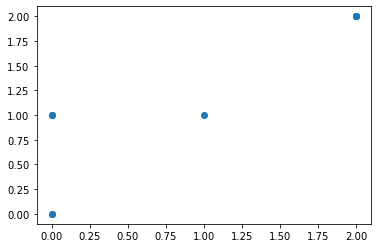

In [11]:
txt="""LCST,LCST.1
A,A
A,A
A,A+
A+,A+
A,A+
B,CCC+
B,CCC+
B,CCC+
B,CCC+
"""
df = pd.read_csv(io.StringIO(txt), sep=',')
encoder = preprocessing.LabelEncoder()

df['LCST']=encoder.fit_transform(df['LCST'])
df['LCST.1']=encoder.fit_transform(df['LCST.1'])
print(df)
plt.scatter('LCST','LCST.1',data=df)
plt.show()

In [26]:
txt="""ID,DATE,C1,C2
AACH,2022-06-10 05:00:00+00:00,70,2
AAHA,2022-01-12 06:00:00+00:00,60,6
AAHA,2022-04-07 05:00:00+00:00,60,4
AAHA,2022-05-20 05:00:00+00:00,60,5
AALU,2021-09-10 05:00:00+00:00,70,0
AALU,2021-11-29 06:00:00+00:00,70,4
AALU,2022-05-17 05:00:00+00:00,60,5
ABAL,2021-10-11 05:00:00+00:00,60,0
ABAL,2022-03-17 05:00:00+00:00,80,4
ABAN,2021-05-24 05:00:00+00:00,60,3
ABAN,2021-06-24 05:00:00+00:00,70,2
ABAN,2021-08-10 05:00:00+00:00,60,3
ABAN,2022-01-14 06:00:00+00:00,70,2
ABAN,2022-03-18 05:00:00+00:00,60,5
ABAN,2022-04-21 05:00:00+00:00,70,2"""

df = pd.read_csv(io.StringIO(txt), sep=',')

print(df.columns)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by=['ID','DATE'])

old_ID=""
for index,row in df.iterrows():
    if row['ID']!=old_ID:
        min_c1=df.iloc[index]['C1']
        min_c2=df.iloc[index]['C2']
       
    df.loc[index,'C1_GT_initC1']=df.iloc[index]['C1']>min_c1
    df.loc[index,'C2_LT_initC2']=df.iloc[index]['C2']<min_c2
    old_ID=row['ID']

print(df)

Index(['ID', 'DATE', 'C1', 'C2'], dtype='object')
70 2
60 6
70 0
60 0
60 3
      ID                      DATE  C1  C2 C1_GT_initC1 C2_LT_initC2
0   AACH 2022-06-10 05:00:00+00:00  70   2        False        False
1   AAHA 2022-01-12 06:00:00+00:00  60   6        False        False
2   AAHA 2022-04-07 05:00:00+00:00  60   4        False         True
3   AAHA 2022-05-20 05:00:00+00:00  60   5        False         True
4   AALU 2021-09-10 05:00:00+00:00  70   0        False        False
5   AALU 2021-11-29 06:00:00+00:00  70   4        False        False
6   AALU 2022-05-17 05:00:00+00:00  60   5        False        False
7   ABAL 2021-10-11 05:00:00+00:00  60   0        False        False
8   ABAL 2022-03-17 05:00:00+00:00  80   4         True        False
9   ABAN 2021-05-24 05:00:00+00:00  60   3        False        False
10  ABAN 2021-06-24 05:00:00+00:00  70   2         True         True
11  ABAN 2021-08-10 05:00:00+00:00  60   3        False        False
12  ABAN 2022-01-14 06:00:00

In [148]:
print ("find combinations of words with or without periods")

data="single intravenously intravenous IV oral PO intraperitoneal intraperitoneally i.p. ip"
matches=re.findall(r'[iI](?:\.)?[vV](?:\.)?|intravenous(?:ly)?|[pP](?:\.)?[oO](?:\.)?|peroral(?:ly)?|oral(?:ly)?|[iI](?:\.)?[pP](?:\.)?|intraperitoneal(?:ly)?',data)
print(matches)

find combinations of words with or without periods
['intravenously', 'intravenous', 'IV', 'oral', 'PO', 'intraperitoneal', 'intraperitoneally', 'i.p.', 'ip']


In [246]:
data = {'token_1': [['cat', 'bag', 'sitting'],
                    ['dog', 'eats', 'bowls'],
                    ['mouse', 'mustache', 'tail'],
                   ['dog', 'eat', 'meat']],
        'token_2': [['cat', 'from', 'bag', 'cat', 'in', 'bag', 'sitting', 'whole', 'day'],
                    ['dog', 'eats', 'from', 'bowls', 'dog', 'eats', 'always', 'from', 'bowls', 'eats', 'bowl'],
                   ['mouse', 'with', 'a', 'big', 'tail', 'and,' 'ears', 'a', 'mouse', 'with', 'a', 'mustache', 'and', 'a', 'tail' ,'runs', 'fast'],
                   ['dog', 'eat', 'meat', 'chicken', 'from', 'bowl','dog','see','meat','eat']]}

df = pd.DataFrame(data)
df.reset_index(inplace=True)

df['intersect']=df.apply(lambda x: set(x['token_1']).intersection(set(x['token_2'])),axis=1)
print(df)
def ConvertToDict(lst):
    res_dct = {i: lst[i] for i in range(0, len(lst), 1)}
    return res_dct

df['new_result']=''
for index,row in df.iterrows():
    #print(row['token_2'])
    dct2=ConvertToDict(row['token_2'])
    dct1=ConvertToDict(list(row['intersect']))
    #print(dct)
    #print(tokens)
    lst=[]
    for token in dct2.items():
        lst.append(token[1])
        #print("token",token[1])
        for i in range(len(dct2)):
            if dct2.get(i)==token: 
                if i<len(dct):
                    word=dct2.get(i+1)
                    if len(word)<3:
                        lst.append(word)
                    break
        #print(lst)
    df.at[index,"new_result"]=lst
    
print(df)

   index                  token_1  \
0      0      [cat, bag, sitting]   
1      1       [dog, eats, bowls]   
2      2  [mouse, mustache, tail]   
3      3         [dog, eat, meat]   

                                             token_2                intersect  
0  [cat, from, bag, cat, in, bag, sitting, whole,...      {sitting, cat, bag}  
1  [dog, eats, from, bowls, dog, eats, always, fr...       {dog, bowls, eats}  
2  [mouse, with, a, big, tail, and,ears, a, mouse...  {tail, mouse, mustache}  
3  [dog, eat, meat, chicken, from, bowl, dog, see...         {dog, meat, eat}  
   index                  token_1  \
0      0      [cat, bag, sitting]   
1      1       [dog, eats, bowls]   
2      2  [mouse, mustache, tail]   
3      3         [dog, eat, meat]   

                                             token_2                intersect  \
0  [cat, from, bag, cat, in, bag, sitting, whole,...      {sitting, cat, bag}   
1  [dog, eats, from, bowls, dog, eats, always, fr...       {dog, b